In [1]:
!pip install numpy


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np

# Specify the path to your .npy file
file_path = "./DelhiData_3hr_sample_V9_Eju.npy"

# Load the .npy file
data = np.load(file_path)

# Use the data as you need
print(data)


[[[ 2.88371143e+02  9.24701594e+01  1.12868517e+01 ...  2.12712078e+00
    3.01771577e-01  2.45503435e+02]
  [ 3.08531213e+02  7.66950000e+01  1.27500000e+01 ...  2.27545874e+00
    3.00000000e-01  1.86670000e+02]
  [ 1.45786509e+02  9.05731000e+01  1.26310958e+01 ...  2.27545874e+00
    3.50307783e-01  2.08072876e+02]
  ...
  [ 2.99935285e+02  9.09107307e+01  1.08661561e+01 ...  2.47182995e+00
    2.17875587e-01  1.55353600e+02]
  [ 2.21932266e+02  9.22395905e+01  7.28072471e+00 ...  2.27545874e+00
    4.02479375e-01  2.05377265e+02]
  [ 2.56391033e+02  9.08770181e+01  1.25169407e+01 ...  2.12712078e+00
    3.42426038e-01  2.07707649e+02]]

 [[ 2.53242414e+02  9.27631101e+01  2.89222704e+01 ...  1.06756392e+00
    3.02264733e-01  1.42233068e+02]
  [ 5.19598940e+02  8.00566667e+01  1.46666667e+01 ...  1.05484924e+00
    3.00000000e-01  8.40000000e+01]
  [ 1.25668618e+02  9.03692239e+01  4.46992929e+01 ...  1.05484924e+00
    3.21812394e-01  1.57120729e+02]
  ...
  [ 2.70341606e+02  9.1

In [3]:
data.shape

(8755, 38, 12)

In [4]:
import numpy as np

# Assuming 'data' is your dataset
data = np.array(data)  # Replace 'your_data' with your actual data

num_days = data.shape[0] // 8  # Total number of days

# Reshape the data to split it into days
reshaped_data = data[:num_days*8, :, :].reshape((num_days, 8, data.shape[1], data.shape[2]))

# Calculate the mean of the covariates for each day
daily_means = np.mean(reshaped_data, axis=1)

# 'daily_means' will be the array containing the mean of covariates for each day
print(daily_means)  # Display the array of daily mean covariate values


[[[ 2.03515499e+02  8.64440563e+01  7.43967195e+01 ...  4.24747065e+00
    4.51242669e-01  1.78538739e+02]
  [ 3.51943352e+02  7.16945833e+01  1.60219167e+02 ...  4.27554891e+00
    3.02500000e-01  1.44313750e+02]
  [ 9.68405726e+01  8.31859014e+01  6.77751874e+01 ...  4.27554891e+00
    5.35419889e-01  1.60821110e+02]
  ...
  [ 2.29181359e+02  8.22298376e+01  5.90277560e+01 ...  4.55121029e+00
    3.48628904e-01  1.11544120e+02]
  [ 1.85381737e+02  8.42231343e+01  7.73679375e+01 ...  4.27554891e+00
    6.54222309e-01  1.74599373e+02]
  [ 2.17277441e+02  8.34214071e+01  6.82406887e+01 ...  4.24747065e+00
    5.19401682e-01  1.66987201e+02]]

 [[ 1.77495996e+02  8.73763345e+01  8.01581853e+01 ...  3.62445122e+00
    5.04140530e-01  2.07369984e+02]
  [ 3.41588542e+02  7.19029167e+01  1.60340208e+02 ...  3.04981821e+00
    3.46250000e-01  2.06416250e+02]
  [ 9.28827577e+01  8.40407645e+01  7.51979731e+01 ...  3.04981821e+00
    6.04474409e-01  2.10322221e+02]
  ...
  [ 1.78114118e+02  8.2

In [26]:
#(8755, 38, 12)

In [24]:
# Accessing the first covariate
first_covariate = daily_means[:,0,0]  # Accessing the first column

# Print the first covariate
print(first_covariate)

[203.51549919 177.4959963  172.36195667 ... 176.81094593 102.52949468
 120.62000569]


In [29]:
alipur_pm2_5 = first_covariate

In [36]:
alipur_pm2_5

0
1970-01-01 00:00:00.000000000  203.515499
1970-01-01 00:00:00.000000001  177.495996
1970-01-01 00:00:00.000000002  172.361957
1970-01-01 00:00:00.000000003  193.186645
1970-01-01 00:00:00.000000004  214.995022
...                                   ...
1970-01-01 00:00:00.000001089  165.142952
1970-01-01 00:00:00.000001090  176.069560
1970-01-01 00:00:00.000001091  176.810946
1970-01-01 00:00:00.000001092  102.529495
1970-01-01 00:00:00.000001093  120.620006

[1094 rows x 1 columns]

In [41]:
# Creating a DataFrame with a datetime index
dates = pd.date_range(start='2020-01-01', periods=len(first_covariate), freq='D')
df = pd.DataFrame({'pm2_5_values': first_covariate}, index=dates)

# Grouping the data by month
monthly_groups = df.groupby(df.index.month)

# Printing the data for each month
for month, group in monthly_groups:
    print(f"Data for month {month}:")
    print(group)
    print()

Data for month 1:
            pm2_5_values
2020-01-01    203.515499
2020-01-02    177.495996
2020-01-03    172.361957
2020-01-04    193.186645
2020-01-05    214.995022
...                  ...
2022-01-27     76.834427
2022-01-28     66.732184
2022-01-29     79.014580
2022-01-30     79.073340
2022-01-31     81.230161

[93 rows x 1 columns]

Data for month 2:
            pm2_5_values
2020-02-01    135.165070
2020-02-02     88.022152
2020-02-03     74.408772
2020-02-04     72.206978
2020-02-05     97.443523
...                  ...
2022-02-24     96.531782
2022-02-25    110.685933
2022-02-26     82.429880
2022-02-27     64.704576
2022-02-28     53.318196

[85 rows x 1 columns]

Data for month 3:
            pm2_5_values
2020-03-01    108.866976
2020-03-02     82.461905
2020-03-03     72.776483
2020-03-04     70.581943
2020-03-05     67.159175
...                  ...
2022-03-27     27.425803
2022-03-28     23.537144
2022-03-29     22.582133
2022-03-30     24.676903
2022-03-31     27.37847

# Box plot of the alipur station pm2.5 values in every month

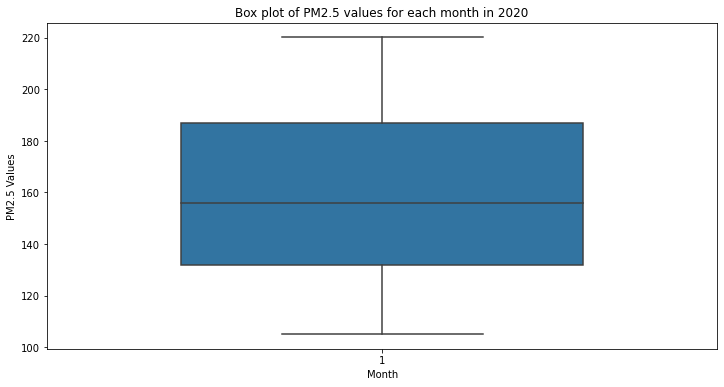

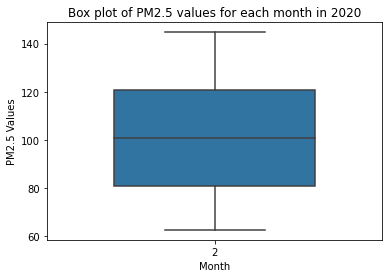

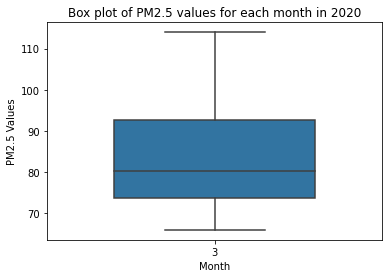

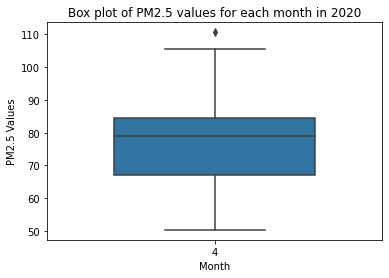

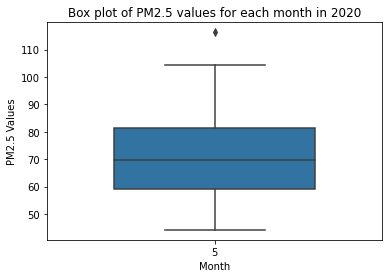

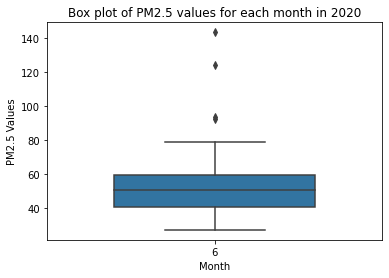

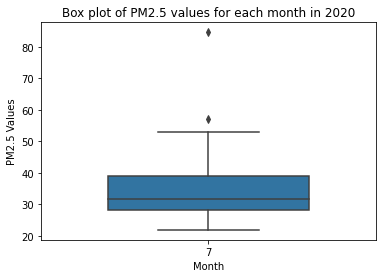

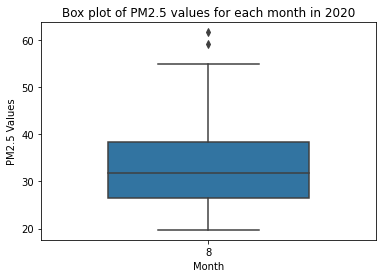

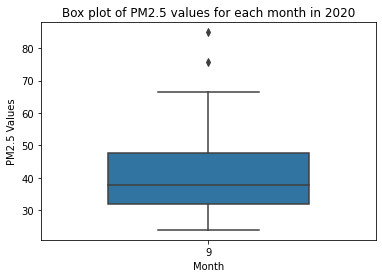

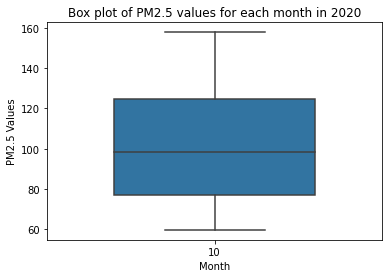

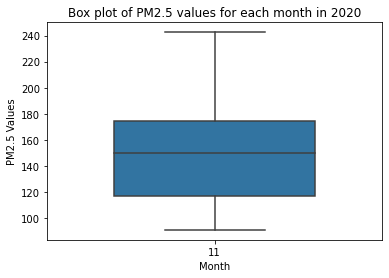

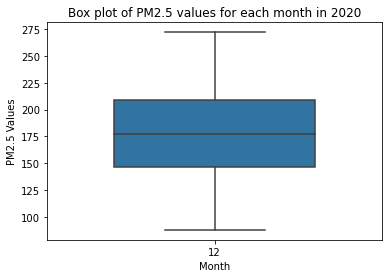

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'first_covariate' is your array of PM2.5 values
# Assuming 'dates' and 'df' are already created as in your code snippet

# Grouping the data by month
monthly_groups = df[df.index.year == 2020].groupby(df[df.index.year == 2020].index.month)

# Plotting box plots for each month
plt.figure(figsize=(12, 6))
for month, group in monthly_groups:
    sns.boxplot(x=group.index.month, y=group['pm2_5_values'], data=group, width=0.6)
    plt.title('Box plot of PM2.5 values for each month in 2020')
    plt.xlabel('Month')
    plt.ylabel('PM2.5 Values')
    plt.show()


In [30]:
alipur_pm2_5.shape

(1094,)

In [31]:
# Alipur station paticucular matter time series plot 

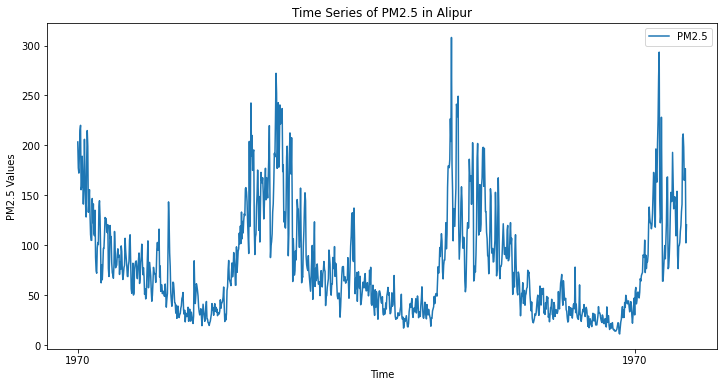

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'alipur_pm2_5' is your DataFrame and the timestamps are in the index
# Replace this with your actual DataFrame
alipur_pm2_5 = pd.DataFrame(alipur_pm2_5)

# Plotting the time series
alipur_pm2_5.index = pd.to_datetime(alipur_pm2_5.index)  # Convert index to datetime if it's not already
plt.figure(figsize=(12, 6))
plt.plot(alipur_pm2_5.index, alipur_pm2_5.iloc[:, 0], label='PM2.5')  # Assuming the first column is PM2.5
plt.title('Time Series of PM2.5 in Alipur')  # Set your own title
plt.xlabel('Time')  # Set your own label
plt.ylabel('PM2.5 Values')  # Set your own label
plt.legend()
plt.show()


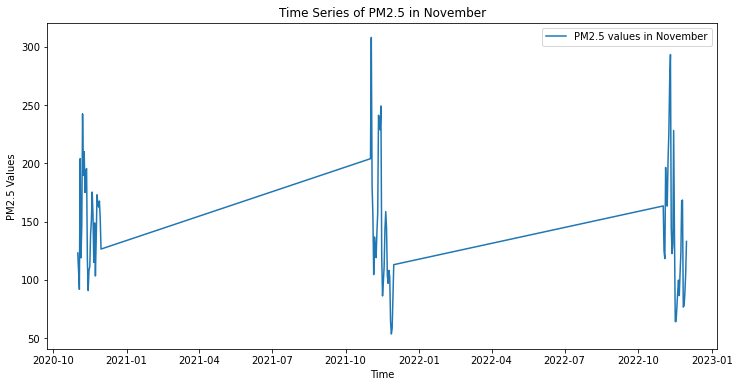

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'first_covariate' is your array of PM2.5 values
# Assuming 'dates' and 'df' are already created as in your code snippet

# Filtering the data for November
november_data = df[df.index.month == 11]

# Plotting the time series for November
plt.figure(figsize=(12, 6))
plt.plot(november_data.index, november_data['pm2_5_values'], label='PM2.5 values in November')
plt.title('Time Series of PM2.5 in November')
plt.xlabel('Time')
plt.ylabel('PM2.5 Values')
plt.legend()
plt.show()


# November month pm2.5 values time series plot

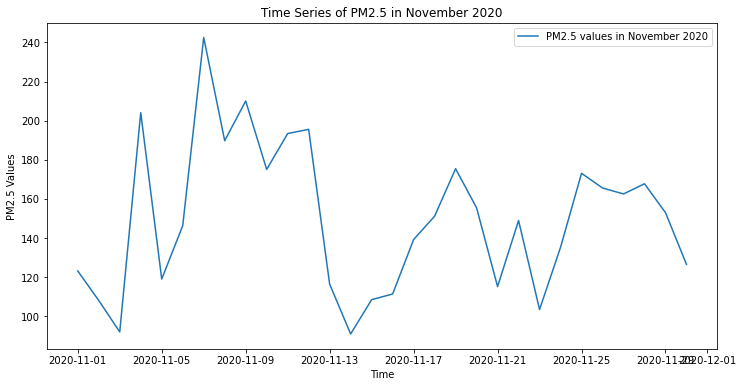

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'first_covariate' is your array of PM2.5 values
# Assuming 'dates' and 'df' are already created as in your code snippet

# Filtering the data for November 2020
november_2020_data = df[(df.index.month == 11) & (df.index.year == 2020)]

# Plotting the time series for November 2020
plt.figure(figsize=(12, 6))
plt.plot(november_2020_data.index, november_2020_data['pm2_5_values'], label='PM2.5 values in November 2020')
plt.title('Time Series of PM2.5 in November 2020')
plt.xlabel('Time')
plt.ylabel('PM2.5 Values')
plt.legend()
plt.show()


In [5]:
daily_means.shape

(1094, 38, 12)

In [6]:
import pandas as pd

In [7]:
monitoring_system_data = pd.read_csv("./static_delhi_feat.csv")

In [8]:
monitoring_system_data

Unnamed: 0                         Staton_name  Pop Density  Very dense  \
0            1                              Alipur            1    0.000250   
1            2                         Anand_Vihar            3    0.000000   
2            3                         Ashok_Vihar            8    0.000250   
3            4                           Aya_Nagar            1    0.010440   
4            5                              Bawana            1    0.000250   
5            6                     Burari_Crossing            2    0.000000   
6            7                   CRRI_Mathura_Road            3    0.010440   
7            8       Dr_Karni_Singh_Shooting_Range            6    0.010440   
8            9                                 DTU            1    0.000250   
9           10                     Dwarka_Sector_8            3    0.005629   
10          11                    East_Arjun_Nagar            7    0.000000   
11          12                      IGI_Airport_T3            1    0.005629   
12          13                               IHBAS            7    0.000000   
13          14                                 ITO           10    0.000000   
14          15                        Jahangirpuri            5    0.000250   
15          16            Jawaharlal_Nehru_Stadium            3    0.010440   
16          17                          Lodhi_Road            4    0.047714   
17          18  Major_Dhyan_Chand_National_Stadium            2    0.047714   
18          19                         Mandir_Marg            8    0.047714   
19          20                              Mundka            9    0.000000   
20          21                           Najafgarh            1    0.005629   
21          22                              Narela            1    0.000250   
22          23                         Nehru_Nagar            4    0.010440   
23          24                        North_Campus            6    0.000000   
24          25                         NSIT_Dwarka            2    0.005629   
25          26                       Okhla_Phase_2            9    0.010440   
26          27                          Patparganj            9    0.000000   
27          28                        Punjabi_Bagh            7    0.005629   
28          29                     Pusa_Delhi_DPCC            9    0.000000   
29          30                  Pusa_New_Delhi_IMD            6    0.005629   
30          31                            RK_Puram            4    0.000000   
31          32                              Rohini            4    0.000250   
32          33                            Shadipur            6    0.000000   
33          34                            Sirifort            7    0.010440   
34          35                         Sonia_Vihar            4    0.000000   
35          36                  Sri_Aurobindo_Marg            4    0.010440   
36          37                         Vivek_Vihar            9    0.000000   
37          38                            Wazirpur            6    0.000250   

    Mod dense  open Forest   Latitude  Longitude  
0    0.016659     0.020568  28.815329  77.153010  
1    0.017812     0.028906  28.646835  77.316032  
2    0.016659     0.020568  28.695381  77.181665  
3    0.054480     0.248360  28.470691  77.109936  
4    0.016659     0.020568  28.776200  77.051074  
5    0.050678     0.030847  28.725650  77.201157  
6    0.054480     0.248360  28.551201  77.273574  
7    0.054480     0.248360  28.498571  77.264840  
8    0.016659     0.020568  28.750050  77.111261  
9    0.030166     0.063492  28.571027  77.071901  
10   0.017812     0.028906  28.655602  77.285932  
11   0.030166     0.063492  28.562776  77.118005  
12   0.018667     0.049667  28.681174  77.302523  
13   0.089200     0.112800  28.631694  77.249439  
14   0.016659     0.020568  28.732820  77.170633  
15   0.054480     0.248360  28.580280  77.233829  
16   0.158000     0.260286  28.591825  77.227307  
17  

In [9]:
monitoring_system_data.rename(columns={'Unnamed: 0': 'system_id'}, inplace=True)


In [10]:
monitoring_system_data.columns

Index(['system_id', 'Staton_name', 'Pop Density', 'Very dense', 'Mod dense',
       'open Forest', 'Latitude', 'Longitude'],
      dtype='object')

In [11]:
monitoring_system_data

system_id                         Staton_name  Pop Density  Very dense  \
0           1                              Alipur            1    0.000250   
1           2                         Anand_Vihar            3    0.000000   
2           3                         Ashok_Vihar            8    0.000250   
3           4                           Aya_Nagar            1    0.010440   
4           5                              Bawana            1    0.000250   
5           6                     Burari_Crossing            2    0.000000   
6           7                   CRRI_Mathura_Road            3    0.010440   
7           8       Dr_Karni_Singh_Shooting_Range            6    0.010440   
8           9                                 DTU            1    0.000250   
9          10                     Dwarka_Sector_8            3    0.005629   
10         11                    East_Arjun_Nagar            7    0.000000   
11         12                      IGI_Airport_T3            1    0.005629   
12         13                               IHBAS            7    0.000000   
13         14                                 ITO           10    0.000000   
14         15                        Jahangirpuri            5    0.000250   
15         16            Jawaharlal_Nehru_Stadium            3    0.010440   
16         17                          Lodhi_Road            4    0.047714   
17         18  Major_Dhyan_Chand_National_Stadium            2    0.047714   
18         19                         Mandir_Marg            8    0.047714   
19         20                              Mundka            9    0.000000   
20         21                           Najafgarh            1    0.005629   
21         22                              Narela            1    0.000250   
22         23                         Nehru_Nagar            4    0.010440   
23         24                        North_Campus            6    0.000000   
24         25                         NSIT_Dwarka            2    0.005629   
25         26                       Okhla_Phase_2            9    0.010440   
26         27                          Patparganj            9    0.000000   
27         28                        Punjabi_Bagh            7    0.005629   
28         29                     Pusa_Delhi_DPCC            9    0.000000   
29         30                  Pusa_New_Delhi_IMD            6    0.005629   
30         31                            RK_Puram            4    0.000000   
31         32                              Rohini            4    0.000250   
32         33                            Shadipur            6    0.000000   
33         34                            Sirifort            7    0.010440   
34         35                         Sonia_Vihar            4    0.000000   
35         36                  Sri_Aurobindo_Marg            4    0.010440   
36         37                         Vivek_Vihar            9    0.000000   
37         38                            Wazirpur            6    0.000250   

    Mod dense  open Forest   Latitude  Longitude  
0    0.016659     0.020568  28.815329  77.153010  
1    0.017812     0.028906  28.646835  77.316032  
2    0.016659     0.020568  28.695381  77.181665  
3    0.054480     0.248360  28.470691  77.109936  
4    0.016659     0.020568  28.776200  77.051074  
5    0.050678     0.030847  28.725650  77.201157  
6    0.054480     0.248360  28.551201  77.273574  
7    0.054480     0.248360  28.498571  77.264840  
8    0.016659     0.020568  28.750050  77.111261  
9    0.030166     0.063492  28.571027  77.071901  
10   0.017812     0.028906  28.655602  77.285932  
11   0.030166     0.063492  28.562776  77.118005  
12   0.018667     0.049667  28.681174  77.302523  
13   0.089200     0.112800  28.631694  77.249439  
14   0.016659     0.020568  28.732820  77.170633  
15   0.054480     0.248360  28.580280  77.233829  
16   0.158000     0.260286  28.591825  77.227307  
17   0.158000     0.260286  28.611281  77.2

In [12]:
new_points_data  = pd.read_csv("inside_delhi_1350pts_lat_Lon.csv")

In [13]:
new_points_data

longitude  latitude
0        77.171    28.414
1        77.181    28.414
2        77.192    28.414
3        77.202    28.414
4        77.213    28.414
...         ...       ...
1345     77.078    28.864
1346     77.088    28.864
1347     77.098    28.864
1348     77.109    28.864
1349     77.088    28.874

[1350 rows x 2 columns]

In [14]:
import pandas as pd
from math import radians, sin, cos, sqrt, atan2

# Assuming 'monitoring_system_data' is your monitoring system data
monitoring_system_data = monitoring_system_data   # Replace with your actual data file

# Assuming 'new_points_data' is your new 1350 points data
new_points_data = new_points_data  # Replace with your actual data file

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # approximate radius of the Earth in kilometers

    lat1_rad, lon1_rad, lat2_rad, lon2_rad = map(radians, [lat1, lon1, lat2, lon2])

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

# Iterate through each new point and find the closest monitoring system
for index, point in new_points_data.iterrows():
    min_distance = float('inf')
    assigned_system = None

    for idx, system in monitoring_system_data.iterrows():
        dist = haversine(point['latitude'], point['longitude'], system['Latitude'], system['Longitude'])
        if dist < min_distance:
            min_distance = dist
            assigned_system = system['system_id']

    # Update the new points data with the assigned monitoring system
    new_points_data.at[index, 'assigned_system'] = assigned_system

# Now new_points_data has the assigned monitoring system for each point
print(new_points_data)


      longitude  latitude  assigned_system
0        77.171    28.414              4.0
1        77.181    28.414              4.0
2        77.192    28.414              4.0
3        77.202    28.414              4.0
4        77.213    28.414              8.0
...         ...       ...              ...
1345     77.078    28.864             22.0
1346     77.088    28.864             22.0
1347     77.098    28.864             22.0
1348     77.109    28.864             22.0
1349     77.088    28.874             22.0

[1350 rows x 3 columns]


In [15]:
new_points_data.columns

Index(['longitude', 'latitude', 'assigned_system'], dtype='object')

In [16]:
new_points_data

longitude  latitude  assigned_system
0        77.171    28.414              4.0
1        77.181    28.414              4.0
2        77.192    28.414              4.0
3        77.202    28.414              4.0
4        77.213    28.414              8.0
...         ...       ...              ...
1345     77.078    28.864             22.0
1346     77.088    28.864             22.0
1347     77.098    28.864             22.0
1348     77.109    28.864             22.0
1349     77.088    28.874             22.0

[1350 rows x 3 columns]

In [17]:
# Find the count of occurrences for each assigned system
system_counts = new_points_data['assigned_system'].value_counts()

# Display the counts
print(system_counts)

21.0    151
5.0     135
25.0     97
20.0     84
1.0      64
10.0     58
8.0      57
22.0     56
4.0      54
36.0     49
12.0     49
35.0     37
9.0      31
6.0      31
29.0     30
26.0     27
27.0     27
19.0     27
28.0     25
15.0     25
7.0      21
32.0     21
31.0     21
14.0     18
3.0      17
13.0     17
34.0     14
11.0     13
23.0     13
18.0     12
38.0     12
2.0      11
30.0     10
17.0     10
24.0      8
16.0      8
37.0      5
33.0      5
Name: assigned_system, dtype: int64


# 0- pm2.5, 1- RH, 2- SR, 3- A2MTEMP, 4- KINDEX, 5- PBL, 6- precip, 7- surf_pressure, 8- u, 9-v, 10-windx, 11- windy


In [57]:
#linear regression fit for alipur

In [45]:
alipur_data = daily_means[:,0,:]
alipur_data

array([[203.51549919,  86.44405625,  74.3967195 , ...,   4.24747065,
          0.45124267, 178.53873855],
       [177.4959963 ,  87.37633451,  80.15818533, ...,   3.62445122,
          0.50414053, 207.36998423],
       [172.36195667,  82.84608276,  87.50042499, ...,  -9.14991949,
          0.58144707, 243.08146233],
       ...,
       [176.81094593,  62.54791667,  93.05520833, ...,  -5.13684788,
          0.86875   , 218.55625   ],
       [102.52949468,  53.34375   , 130.09479167, ...,  -4.03261303,
          0.91875   , 272.24375   ],
       [120.62000569,  62.82604167, 127.315625  , ...,  -4.34465253,
          1.2375    , 282.61875   ]])

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [49]:
data = alipur_data

In [50]:
# Splitting the data into features (X) and target (y)
X = data[:, 1:]
y = data[:, 0]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating the linear regression model
model = LinearRegression()

# Fitting the model with the training data
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Printing the coefficients and intercept
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

# Printing the predicted values
print("Predicted values: ", y_pred)

Coefficients:  [-1.05823959e+00 -2.76419023e-01 -1.19000919e+01  5.02001806e-01
  8.65645417e-02  2.73044812e+03  6.87765300e-03 -2.52097380e+00
 -2.46030830e+00 -4.01654369e+00  3.30200676e-04]
Intercept:  3010.0805616697185
Predicted values:  [ 74.08770051 145.85357554 111.8634912   61.69555528  74.05206699
 146.91302622  35.59914146 121.25422988  89.00756977  69.88144065
  54.46875107  60.02550271 125.87194905  63.47966441 113.66351665
 138.46060451 167.2393002  118.75997386  69.58471441  36.74040345
 128.24261314 139.57581225  84.12210608  38.41828449  97.53424708
 128.77438582 103.43850761  45.80075181  69.79695035  35.87045773
  67.27506575  52.35097697  26.88320605  21.02003275  82.53699542
  54.76941686  47.57332677  87.72974015  30.30213105  45.21817871
  96.55085405  88.96034561  33.24716043 115.23027297  88.01007388
 155.1191672  126.90470957  31.72838433  77.21801069  59.10913489
  40.86331202  81.73479349 160.07870076  56.60038729  66.23819666
  49.64119301  16.64970372  3

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

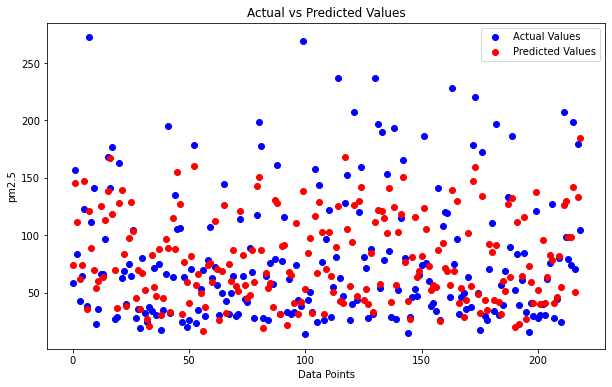

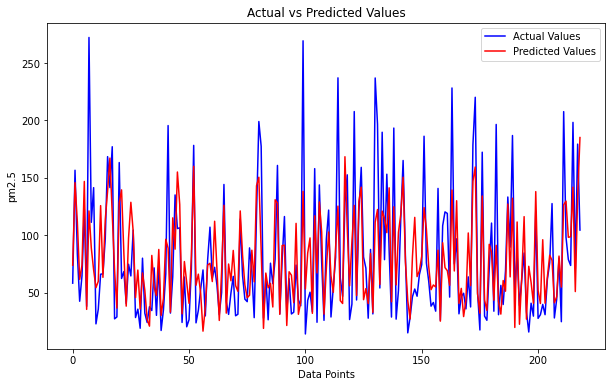

In [54]:
# Splitting the data into features (X) and target (y)
X = data[:, 1:]
y = data[:, 0]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating the linear regression model
model = LinearRegression()

# Fitting the model with the training data
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Plotting the actual values and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, linestyle='-', color='b', label='Actual Values')
plt.plot(range(len(y_pred)), y_pred, linestyle='-', color='r', label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('pm2.5')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import r2_score


In [56]:
# Calculating R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.5529332173661847
